In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [5]:
vd = pd.read_csv('vgsales.csv')

In [6]:
vd

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# Overviewing of the dataset

**Let's briefly understand what type of data we are working with and if there's any null value**

In [7]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
len(vd['Publisher'].value_counts())

578

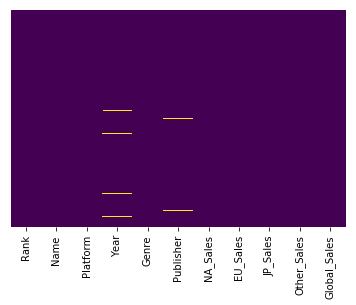

In [9]:
sns.heatmap(vd.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**It seem that theres a few null values. Let's see how representative are they**

In [17]:
vd['Year'].isnull().value_counts(True)

False    0.983673
True     0.016327
Name: Year, dtype: float64

In [21]:
vd['Publisher'].isnull().value_counts(True)

False    0.996506
True     0.003494
Name: Publisher, dtype: float64

**Ok, we are talking about 1% null value in 'Year' and < 1% in 'Publisher'. Its good enought to move on without any null treatment**

# How the market is distributed around the globe?

In [22]:
vd_group = vd.groupby('Publisher').sum().sort_values('Global_Sales', ascending = False).reset_index()
vd_group

,Publisher,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,2714164,1394666.0,816.87,418.74,455.42,95.33,1786.56
1,Electronic Arts,7140412,2686562.0,595.07,371.27,14.04,129.77,1110.32
2,Activision,6368325,1938979.0,429.70,215.53,6.54,75.34,727.46
3,Sony Computer Entertainment,4105604,1367034.0,265.22,187.72,74.10,80.45,607.50
4,Ubisoft,6964728,1843194.0,253.43,163.32,7.50,50.26,474.72
5,Take-Two Interactive,2622275,827344.0,220.49,118.14,5.83,55.24,399.54
6,THQ,4772674,1428311.0,208.77,94.73,5.01,32.14,340.77
7,Konami Digital Entertainment,7331538,1650392.0,92.16,69.69,91.30,30.31,283.64
8,Sega,5070801,1267395.0,109.40,82.00,57.03,24.52,272.99
9,Namco Bandai Games,8741157,1863670.0,69.52,42.63,127.07,14.69,254.09


**Simple distribution to see who are the publisher and spread they are in terms of Global Sales**

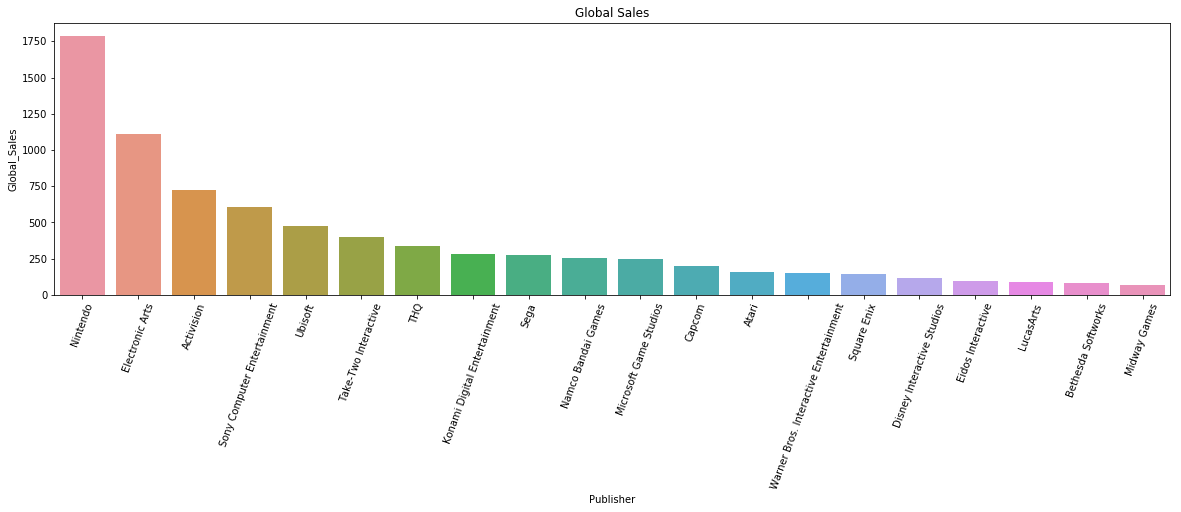

In [40]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=70)
plt.title('Global Sales')
sns.barplot(x = 'Publisher', y = 'Global_Sales', data = vd.groupby('Publisher').sum().sort_values('Global_Sales', ascending = False).reset_index().head(20))

What we can clearly see here is that Nintendo, EA and Activision are the top players in this market followed by a long tail of publisher

**Now I'm trying to understand how concentrated is the market. Who is responsable for 80% of the sales**

In [37]:
def pareto (coluna):
    """Takes as an argument the column of a pre estabilished dataframe (original datafram groupby 'Publisher')
    Return 20% of Publishers that represent 80% of sales"""
    k = 0
    for i in vd_group[coluna]:
        if (k/vd_group[coluna].sum()) < 0.79:
            k = i + k
            if (k/vd_group[coluna].sum()) > 0.79:
                break
    
    s = vd_group[vd_group[coluna] > i]
    
    print(len(s), 'Publisher out of',len(vd_group[coluna]))
    
    # CREATING CHART 80/20
    plt.figure(figsize = (15,5))
    plt.xticks(rotation=70)
    plt.title('80 / 20 Sales')
    sns.barplot(x = 'Publisher', y = 'Global_Sales', data = s)
    
#    print (i)
#    print (k)
#   return (s) --> descomentar para aparecer S como dataframe / por enquanto quero ver apenas os gráficos

14 Publisher out of 578


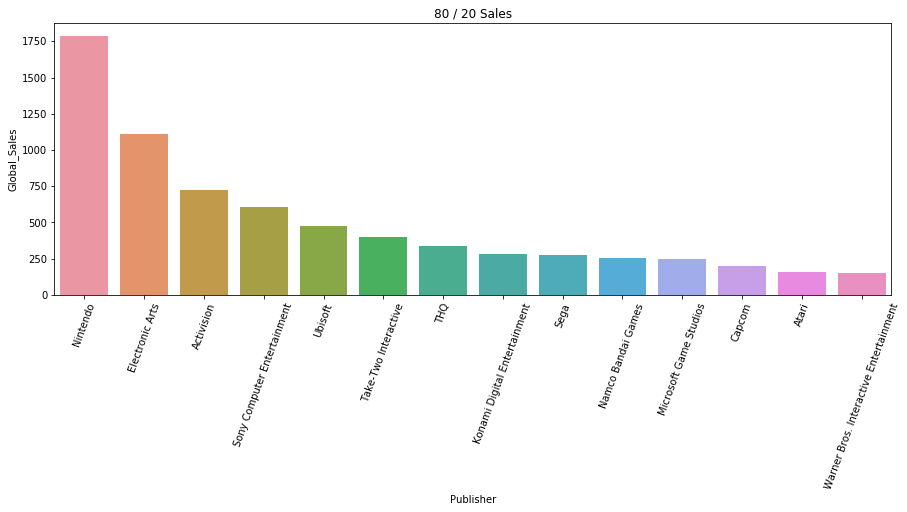

In [38]:
pareto('Global_Sales')

11 Publisher out of 578


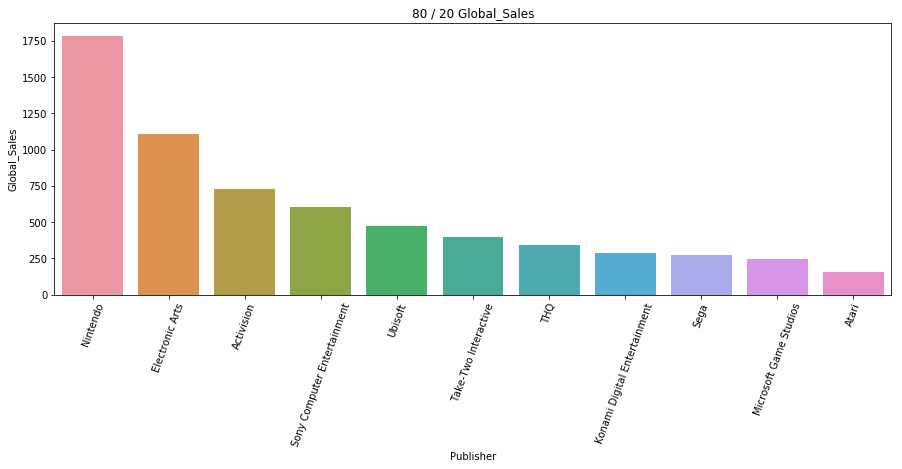

In [28]:
pareto('NA_Sales')

10 Publisher out of 578


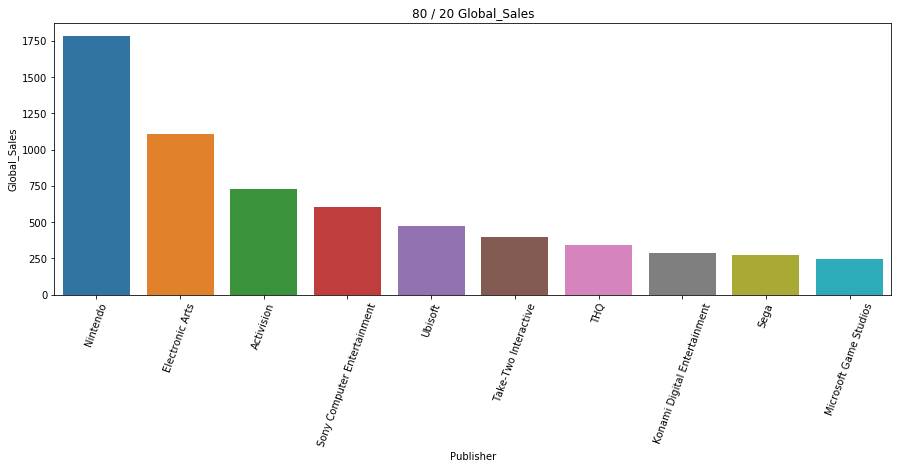

In [29]:
pareto('EU_Sales')

7 Publisher out of 578


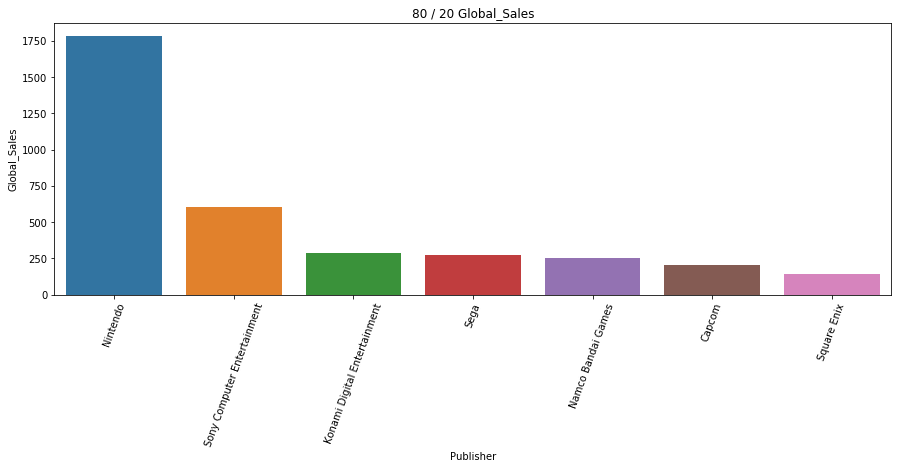

In [30]:
pareto('JP_Sales')

When compared globaly, the market is less concentrated with 14 publisher representing the entire sales

But when analyzing NA, EU and JP we notice that the market gets more concentrade. Also, its interesting to point out that Nintendo appears as the sales leader in all the market with a large gap

# Analyzing along the time

**In order to do so, I'm going to create the vd_year dataset that is the sum of sales in each market and rank by 'Year'. After that, I'm going to plot all together to get a feeling of the participation of each market in the Global Sales**

In [342]:
vd_year = vd.groupby('Year').sum().reset_index()
vd_year

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,29826,10.59,0.67,0.00,0.12,11.38
1,1981.0,190488,33.40,1.96,0.00,0.32,35.77
2,1982.0,149186,26.92,1.65,0.00,0.31,28.86
3,1983.0,56759,7.76,0.80,8.10,0.14,16.79
4,1984.0,22911,33.28,2.10,14.27,0.70,50.36
5,1985.0,55505,33.73,4.74,14.56,0.92,53.94
6,1986.0,35986,12.50,2.84,19.81,1.93,37.07
7,1987.0,54701,8.46,1.41,11.63,0.20,21.74
8,1988.0,37181,23.87,6.59,15.76,0.99,47.22
9,1989.0,40156,45.15,8.44,18.36,1.50,73.45


In [349]:
vd_year['NA + EU'] =  vd_year['NA_Sales'] + vd_year['EU_Sales']
vd_year['NA + EU + JP'] =  vd_year['NA_Sales'] + vd_year['EU_Sales'] + vd_year['JP_Sales']
vd_year

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA + EU,NA + EU + JP
0,1980.0,29826,10.59,0.67,0.00,0.12,11.38,11.26,11.26
1,1981.0,190488,33.40,1.96,0.00,0.32,35.77,35.36,35.36
2,1982.0,149186,26.92,1.65,0.00,0.31,28.86,28.57,28.57
3,1983.0,56759,7.76,0.80,8.10,0.14,16.79,8.56,16.66
4,1984.0,22911,33.28,2.10,14.27,0.70,50.36,35.38,49.65
5,1985.0,55505,33.73,4.74,14.56,0.92,53.94,38.47,53.03
6,1986.0,35986,12.50,2.84,19.81,1.93,37.07,15.34,35.15
7,1987.0,54701,8.46,1.41,11.63,0.20,21.74,9.87,21.50
8,1988.0,37181,23.87,6.59,15.76,0.99,47.22,30.46,46.22
9,1989.0,40156,45.15,8.44,18.36,1.50,73.45,53.59,71.95


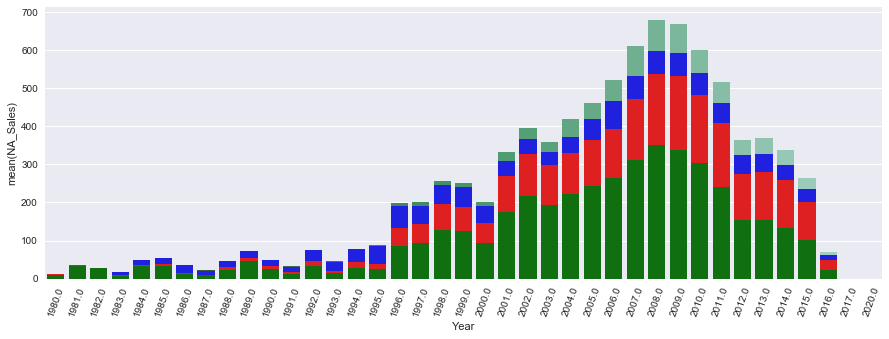

In [350]:
plt.figure(figsize = (15,5))
plt.xticks(rotation=70)
sns.barplot(x = 'Year', y = 'Global_Sales', data = vd_year,palette="BuGn_d")
sns.barplot(x = 'Year', y = 'NA + EU + JP', data = vd_year,color='b',label="Japan")
sns.barplot(x = 'Year', y = 'NA + EU', data = vd_year,color='r',label="Europe")
sns.barplot(x = 'Year', y = 'NA_Sales', data = vd_year,color='g',label="North America",)

From this chart, we can get two ideas:

1 - It seems to me that theres a huge video game sales boom in the period between 1996 and 2015

2 - North America have the highest participation % in the global sales in all the years

**This is the North America market zoomed in**

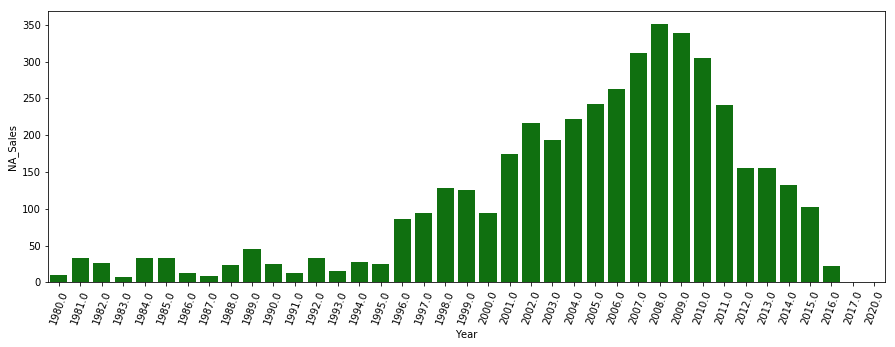

In [42]:
plt.figure(figsize = (15,5))
plt.xticks(rotation= 70)
sns.barplot(x = 'Year', y = 'NA_Sales', data = vd.groupby('Year').sum().reset_index() , color = 'g')      

# A few take away answer

1 - The global market is among many publishers but highly concentrade in three: Nintendo, EA and Activision

2 - When double clicking in the three markets, we can see that on average 10 companies as responsable for 80% of all sales. In Japan specifically, the market presente the highest concentration with only 7 publishers representing 80% of sales

3 - Aside from the market concentration, Nintendo is the top publisher in sales

4 - When analyzing across time, its easy to notice that the sales boom founds itself in a window between 1996 and 2015. Before 1996, video game sales where pretty much stable

5 - Finally, starting in 1996, all the three market presented year after year growth rate, but the North America market stands out for its highest % participation in global sales.